In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
sns.set()

In [2]:
df = pd.read_excel('D:/2018 广东金融学院数学建模第一次模拟(1)/2018 广东金融学院数学建模第一次模拟/附件1.xls')
df.head()

df = df.drop(6329)
df['y'] = df['y'].astype('float')
X = df.loc[:,'x1':'x6'].as_matrix()
y = df.loc[:,'y'].as_matrix()

D:\ruanjian\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
D:\ruanjian\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


In [ ]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.linear_model import RandomizedLogisticRegression as RLR

# 随机分离

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

# 归一化

In [4]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train_standard = standardScaler.transform(X_train)
X_test_standard = standardScaler.transform(X_test)

## 算出拟合直线的系数

In [6]:
lr = LR()
lr.fit(X_train_standard, y_train)
lr.coef_

array([[ 0.22477342, -0.03325838,  0.09424133,  0.00849561,  0.02615797,
         0.23061558]])

## 截距

In [7]:
lr.intercept_

array([1.3117905])

In [8]:
coef_df = DataFrame(lr.coef_.T, index=[1,2,3,4,5,6])

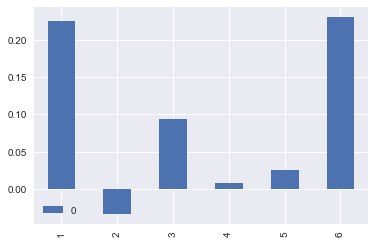

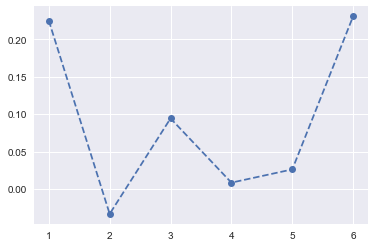

In [9]:
coef_df.plot(kind='bar')
coef_df.plot(linestyle='--', marker='o',legend=False)

In [10]:
rlr = RLR()

D:\ruanjian\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class RandomizedLogisticRegression is deprecated; The class RandomizedLogisticRegression is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


In [11]:
rlr.fit(X_train_standard,y_train)

RandomizedLogisticRegression(C=1, fit_intercept=True, memory=None, n_jobs=1,
               n_resampling=200, normalize=True, pre_dispatch='3*n_jobs',
               random_state=None, sample_fraction=0.75, scaling=0.5,
               selection_threshold=0.25, tol=0.001, verbose=False)

In [12]:
rlr.get_support()

array([ True, False, False, False, False,  True])

# 分类归一化

In [13]:
g = df.groupby(df['x6'])
list(g)

[(1,       Number    y     x1     x2  x3      x4        x5  x6
  0          1  0.0  63.91  50.34   0  0.3662  0.348837   1
  3          4  1.0  67.90  28.41   1  0.5242  0.941395   1
  6          7  1.0  75.15  48.05   0  0.6479  0.093023   1
  8          9  1.0  77.89  48.48   1  0.3685  1.024419   1
  12        13  0.0  26.59  50.12   0  0.5494  1.062326   1
  14        15  1.0  77.89  32.39   1  0.3685  1.160000   1
  17        18  0.0  68.40  61.81   0  0.3380  0.209302   1
  18        19  1.0  74.54  30.82   1  0.4357  1.237674   1
  25        26  1.0  70.65  43.46   0  0.3380  0.255814   1
  38        39  0.0  61.26  54.98   1  0.4357  0.941395   1
  40        41  1.0  41.35  57.39   1  0.1997  1.237674   1
  41        42  1.0  75.15  38.88   0  0.2817  0.093023   1
  43        44  1.0  73.34  39.29   1  0.3941  1.634651   1
  44        45  1.0  70.65  50.34   0  0.3380  0.069767   1
  47        48  1.0  66.12  59.48   1  0.2578  1.191628   1
  48        49  0.0  50.20  57.39   1

In [14]:
for i, new_df in list(g):
    X_new = new_df.loc[:,'x1':'x5']
    y_new = new_df.loc[:,'y']
    standardScaler = StandardScaler()
    standardScaler.fit(X_new)
    X_new_standard = standardScaler.transform(X_new)
    print(DataFrame(X_new_standard,columns=['x1','x2','x3','x4','x5']).corr(method='pearson'))

          x1        x2        x3        x4        x5
x1  1.000000 -0.200168 -0.007270 -0.297410  0.063384
x2 -0.200168  1.000000  0.083215 -0.060647  0.025960
x3 -0.007270  0.083215  1.000000 -0.063728  0.573023
x4 -0.297410 -0.060647 -0.063728  1.000000 -0.230550
x5  0.063384  0.025960  0.573023 -0.230550  1.000000
          x1        x2        x3        x4        x5
x1  1.000000 -0.143111 -0.067962 -0.293818  0.216074
x2 -0.143111  1.000000  0.047956 -0.001082 -0.047577
x3 -0.067962  0.047956  1.000000  0.106185  0.007892
x4 -0.293818 -0.001082  0.106185  1.000000 -0.417823
x5  0.216074 -0.047577  0.007892 -0.417823  1.000000
          x1        x2        x3        x4        x5
x1  1.000000 -0.150762 -0.006625 -0.285676  0.103130
x2 -0.150762  1.000000 -0.028559 -0.029349 -0.041039
x3 -0.006625 -0.028559  1.000000  0.175648  0.047032
x4 -0.285676 -0.029349  0.175648  1.000000 -0.468116
x5  0.103130 -0.041039  0.047032 -0.468116  1.000000
          x1        x2        x3        x4    

# 留下x1和x6进行模型训练

In [15]:
lr = LR()

In [16]:
index = df.loc[:,'x1':'x6'].columns[rlr.get_support()]
d_new = df.loc[:,'x1':'x6']
X = d_new[index]
X.shape

(6329, 2)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [18]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train_standard = standardScaler.transform(X_train)
X_test_standard = standardScaler.transform(X_test)

In [19]:
lr_new = LR()
lr_new.fit(X_train_standard, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
lr_new.score(X_test_standard, y_test)

0.7738471257106759

In [21]:
lr_new.intercept_

array([1.31189357])

In [22]:
lr_new.coef_

array([[0.22847223, 0.25878847]])

# 预测第三题

In [23]:
df = pd.read_excel('D:/2018 广东金融学院数学建模第一次模拟(1)/2018 广东金融学院数学建模第一次模拟/附件2.xlsx')
df.head()

X = df[['x1','x6']].as_matrix()

D:\ruanjian\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [24]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(X)
X_standard = standardScaler.transform(X)

In [25]:
X_standard

array([[ 0.45367371, -0.82375447],
       [-0.03627327, -0.82375447],
       [-0.15304396,  0.82375447],
       [ 0.63413751, -0.82375447],
       [ 0.25687834,  0.82375447],
       [ 0.67496642,  1.64750894],
       [ 0.43325925,  1.64750894],
       [-1.3403488 , -0.82375447],
       [-2.08098531,  0.        ],
       [ 1.04569297, -0.82375447],
       [ 0.77050608, -0.82375447],
       [ 0.99588169, -0.82375447],
       [ 0.25687834,  1.64750894],
       [-1.58695544, -0.82375447],
       [-0.40128376, -0.82375447],
       [-0.87571575,  0.        ],
       [-1.50693077,  1.64750894],
       [ 1.08162241,  0.        ],
       [ 1.37804033, -0.82375447]])

In [26]:
y_test = lr_new.predict(X_standard)

In [27]:
y_test

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1.])

In [28]:
def x2(x1):
    return(-lr_new.coef_[0][0] * x1 - lr_new.intercept_) / lr_new.coef_[0][1]

In [29]:
lr_coef = lr_new.coef_
lr_coef

array([[0.22847223, 0.25878847]])

In [30]:
lr_intercept = lr_new.intercept_
lr_intercept

array([1.31189357])

In [31]:
x_plot = np.linspace(-2.5,2,1000)
y_plot = x2(x_plot)

Text(0.5,1,'预测结果')

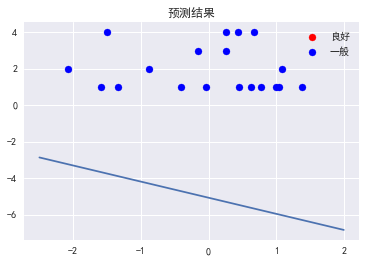

In [32]:
plt.rcParams['font.sans-serif'] = ['SimHei'] # 显示中文标题
plt.rcParams['axes.unicode_minus'] = False   # 正常显示正负号
plt.scatter(X_standard[y_test==0, 0], X[y_test==0, 1], color='red', label='良好')
plt.scatter(X_standard[y_test==1, 0], X[y_test==1, 1], color='blue', label='一般')
plt.plot(x_plot, y_plot)
plt.legend()
plt.title("预测结果")